In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

try:
    df = pd.read_csv('../Data_folder/pv_prod.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)
    print("File read successfully with some lines skipped.")
except Exception as e:
    print(f"Failed to read file: {e}")

df = df.rename(columns = {'Kuupäev (Eesti aeg)':'datetime', 'Päikeseenergia toodang': 'pv_prod'})

File read successfully with some lines skipped.


<ipython-input-2-eb088d8f9f31>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../Data_folder/pv_prod.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-2-eb088d8f9f31>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../Data_folder/pv_prod.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)


In [3]:
try:
    df_c = pd.read_csv('../Data_folder/consumption.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)
    print("File read successfully with some lines skipped.")
except Exception as e:
    print(f"Failed to read file: {e}")
df_c = df_c.rename(columns = {'Kuupäev (Eesti aeg)':'datetime', 'Tarbimine': 'consumption'})

File read successfully with some lines skipped.


<ipython-input-3-f2bfd31f3906>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_c = pd.read_csv('../Data_folder/consumption.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-3-f2bfd31f3906>:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_c = pd.read_csv('../Data_folder/consumption.csv', sep= ';', encoding='ISO-8859-1', decimal=',', error_bad_lines=False, warn_bad_lines=True)


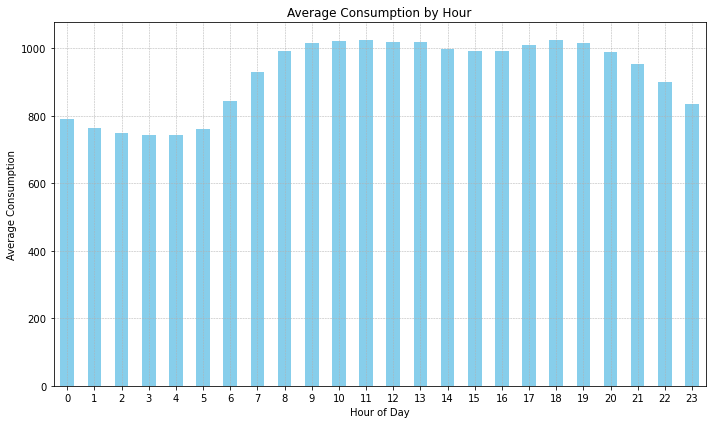

In [4]:


df_c['datetime'] = pd.to_datetime(df_c['datetime'], format='%d.%m.%Y %H:%M')

df_c['hour'] = df_c['datetime'].dt.hour

hourly_avg = df_c.groupby('hour')['consumption'].mean()

plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


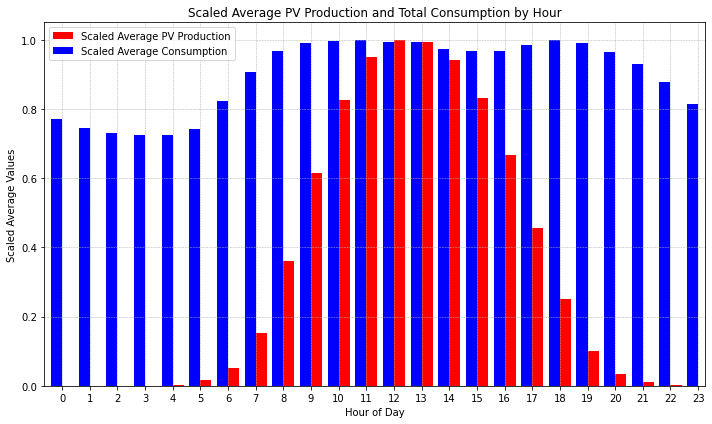

In [5]:


df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%Y %H:%M')
df['hour'] = df['datetime'].dt.hour
pv_hourly_avg = df.groupby('hour')['pv_prod'].mean()
max_pv_avg = pv_hourly_avg.max()
scaled_pv_hourly_avg = pv_hourly_avg / max_pv_avg

df_c['datetime'] = pd.to_datetime(df_c['datetime'], format='%d.%m.%Y %H:%M')
df_c['hour'] = df_c['datetime'].dt.hour
consumption_hourly_avg = df_c.groupby('hour')['consumption'].mean()
max_consumption_avg = consumption_hourly_avg.max()
scaled_consumption_hourly_avg = consumption_hourly_avg / max_consumption_avg

plt.figure(figsize=(10, 6))
scaled_pv_hourly_avg.plot(kind='bar', color='red', position=0, width=0.4, label='Scaled Average PV Production')
scaled_consumption_hourly_avg.plot(kind='bar', color='blue', position=1, width=0.4, label='Scaled Average Consumption')

plt.title('Scaled Average PV Production and Total Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Scaled Average Values')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.savefig('Average_PV_Consumption_Hourly.pdf')

plt.show()


